In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv("regression.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [29]:
df.shape

(398, 9)

In [30]:
#dropping car name
df=df.drop("car name",axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [31]:
df["origin"]= df["origin"].replace({1: "america", 2: "europe", 3: "asia"})
df.sample(10)
#replacing categorical values with actual values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
258,20.6,6,231.0,105,3380,15.8,78,america
104,12.0,8,400.0,167,4906,12.5,73,america
167,29.0,4,97.0,75,2171,16.0,75,asia
260,18.6,6,225.0,110,3620,18.7,78,america
282,22.3,4,140.0,88,2890,17.3,79,america
360,30.7,6,145.0,76,3160,19.6,81,europe
112,19.0,4,122.0,85,2310,18.5,73,america
91,13.0,8,400.0,150,4464,12.0,73,america
217,30.0,4,111.0,80,2155,14.8,77,america
322,46.6,4,86.0,65,2110,17.9,80,asia


In [32]:
## one hot encoding
df=pd.get_dummies(df,columns=["origin"])
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
334,23.7,3,70.0,100,2420,12.5,80,0,1,0
226,20.5,6,231.0,105,3425,16.9,77,1,0,0
190,14.5,8,351.0,152,4215,12.8,76,1,0,0
211,16.5,6,168.0,120,3820,16.7,76,0,0,1
187,17.5,8,305.0,140,4215,13.0,76,1,0,0
277,16.2,6,163.0,133,3410,15.8,78,0,0,1
298,23.0,8,350.0,125,3900,17.4,79,1,0,0
160,17.0,6,231.0,110,3907,21.0,75,1,0,0
216,31.5,4,98.0,68,2045,18.5,77,0,1,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0


###Dealing with missing values

In [33]:
#A quick summary of the data columns
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [34]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


In [36]:
#hp is missing cause it does not seem to be recognised as a numerical column
hpIsDigit=pd.DataFrame(df.horsepower.str.isdigit()) # if the string is made of digits store True

#print is Digit= False
df[hpIsDigit["horsepower"]== False] #from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [37]:
df=df.replace('?', np.nan)
df[hpIsDigit['horsepower']==False]

#for replacing missing values with NaN

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


There are various ways to handle missing values. Drop the rows, rplace missing values with median values etc

In [38]:
#instead of dropping rows, lets use medians to fill the values
df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [39]:
# replace the missing values with median value
#Note - we donot need to specify the column names below
# every column's missing value is replaced with that column's median respectively

medianFiller= lambda x: x.fillna(x.median())
df=df.apply(medianFiller,axis=0)
df['horsepower']= df['horsepower'].astype('float64')  #converting the hp column from object to float

In [40]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


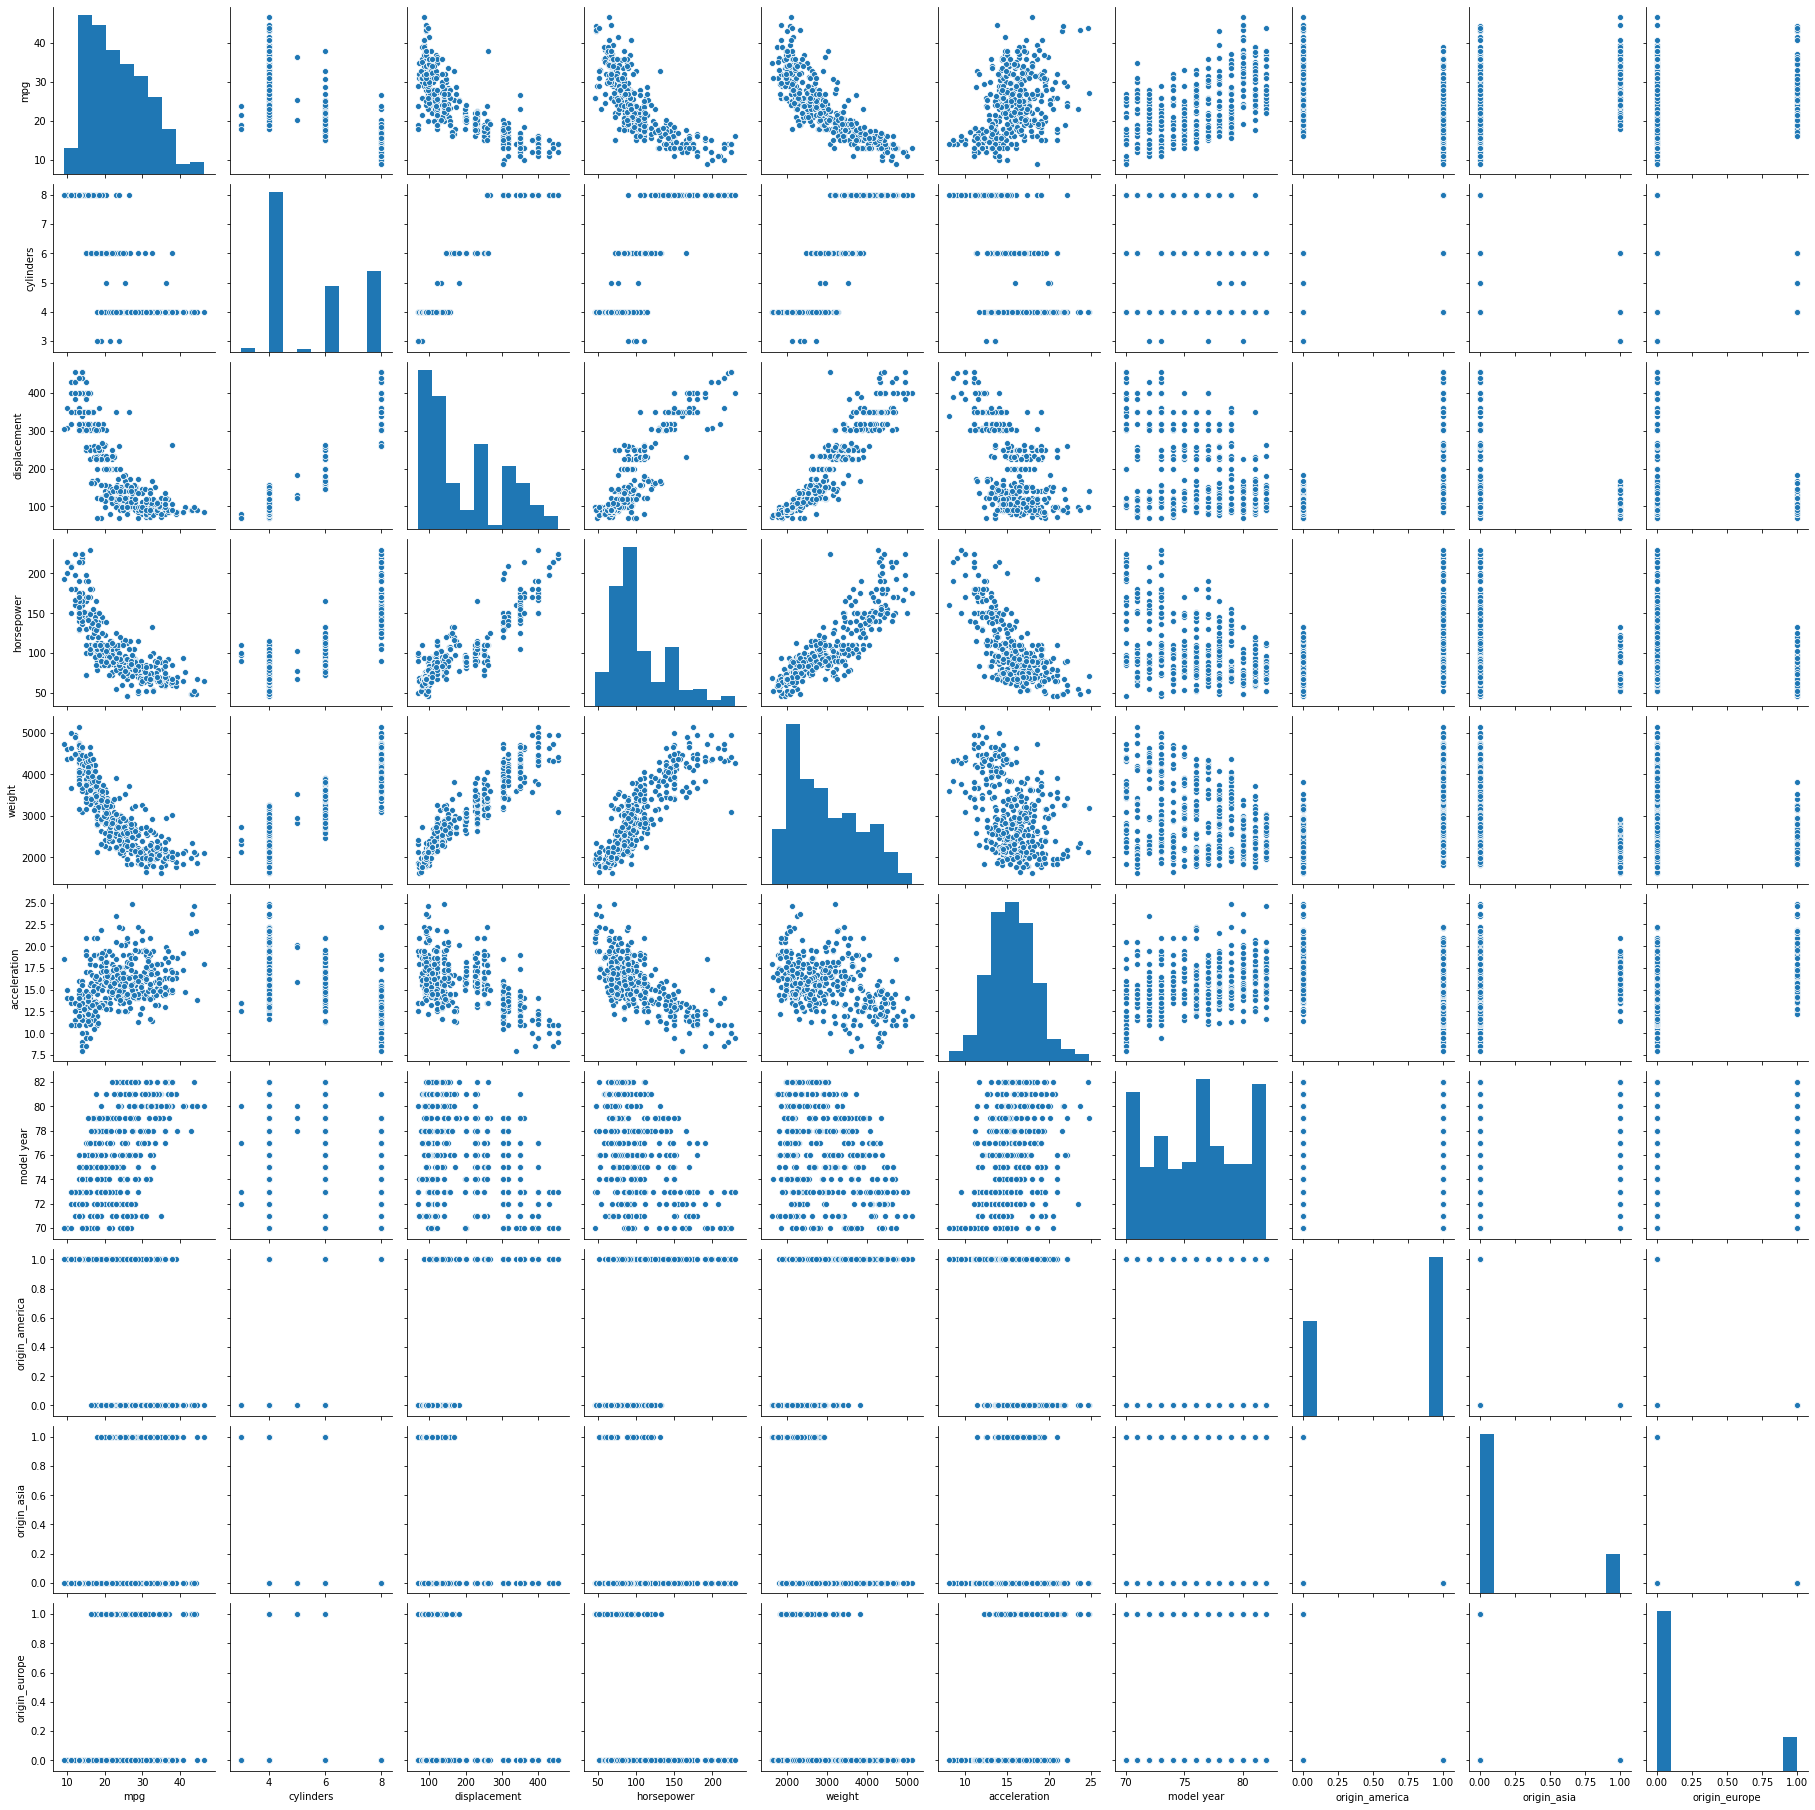

In [41]:
sns.pairplot(df)

Split Data

In [42]:
X= df.drop(['mpg'],axis=1)
Y=df[['mpg']]

In [43]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=0)

Fit Linear model

In [44]:
reg_model=LinearRegression()
reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg_model.score(X_train, Y_train)

0.8215521225570098

In [60]:
reg_model.score(X_test, Y_test)

0.8226939742691545

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly= PolynomialFeatures(degree=2, interaction_only=True)
X_train2= poly.fit_transform(X_train)
X_test2= poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, Y_train)
y_pred= poly_clf.predict(X_test2)

#print(y_pred)

#in sample training R square will always improve with the number of variables

print(poly_clf.score(X_train2, Y_train))
                

0.9044323619677546


In [48]:
print(poly_clf.score(X_test2, Y_test))

0.8638436398297759


In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly= PolynomialFeatures(degree=3, interaction_only=True)
X_train3= poly.fit_transform(X_train)
X_test3= poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train3, Y_train)
y_pred= poly_clf.predict(X_test3)

#print(y_pred)

#in sample training R square will always improve with the number of variables

print(poly_clf.score(X_train3, Y_train))

0.879882516095918


In [55]:
print(poly_clf.score(X_test3, Y_test))

0.6323128971444875


In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly= PolynomialFeatures(degree=4, interaction_only=True)
X_train4= poly.fit_transform(X_train)
X_test4= poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train4, Y_train)
y_pred= poly_clf.predict(X_test4)

#print(y_pred)

#in sample training R square will always improve with the number of variables

print(poly_clf.score(X_train4, Y_train))

0.9355276849010693


In [57]:
print(poly_clf.score(X_test4, Y_test))

-3.7493558096431503


In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly= PolynomialFeatures(degree=5, interaction_only=True)
X_train5= poly.fit_transform(X_train)
X_test5= poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train5, Y_train)
y_pred= poly_clf.predict(X_test5)

#print(y_pred)

#in sample training R square will always improve with the number of variables

print(poly_clf.score(X_train5, Y_train))

0.9619524481425065


In [59]:
print(poly_clf.score(X_test5, Y_test))

-573.4250394834891


Train score < Test score------ not underfitting